# Section 0: Loading Data

## 0.0 Loading

In [0]:
!pip install xgboost
from xgboost import XGBClassifier

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.colors
import matplotlib.pyplot as plt
import warnings

from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB, ComplementNB, GaussianNB, MultinomialNB 
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, KFold
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, cohen_kappa_score, confusion_matrix, ConfusionMatrixDisplay, f1_score, mean_squared_error

In [0]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=17ZvluqiYapI3nWejLkFJSxhf8ACI-KOk' -O tele_churn.csv

--2020-05-16 15:42:14--  https://docs.google.com/uc?export=download&id=17ZvluqiYapI3nWejLkFJSxhf8ACI-KOk
Resolving docs.google.com (docs.google.com)... 172.217.218.139, 172.217.218.100, 172.217.218.102, ...
Connecting to docs.google.com (docs.google.com)|172.217.218.139|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0o-8k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/lnq76fcpec08kvadl15pb72k9arceghg/1589643675000/03716306103365085130/*/17ZvluqiYapI3nWejLkFJSxhf8ACI-KOk?e=download [following]
--2020-05-16 15:42:15--  https://doc-0o-8k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/lnq76fcpec08kvadl15pb72k9arceghg/1589643675000/03716306103365085130/*/17ZvluqiYapI3nWejLkFJSxhf8ACI-KOk?e=download
Resolving doc-0o-8k-docs.googleusercontent.com (doc-0o-8k-docs.googleusercontent.com)... 172.217.218.132, 2a00:1450:4013:c08::84
Connecting to doc-0o-8k-docs.googleusercontent.com (doc-0o

In [0]:
df = pd.read_csv('tele_churn.csv')
df.shape

(7043, 21)

## 0.2 Transform Datatype

In [0]:
df['Churn'] = df['Churn'].apply(lambda x: x =='Yes')
df['SeniorCitizen'] = df['SeniorCitizen'].apply(lambda x: x == 1)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')
df.set_index('customerID',inplace=True)
df.dropna(inplace=True)

In [0]:
# transform categorical variables into numeric ones for multicollinearity analysis
numeric_df = df.drop(columns=['Churn','gender','SeniorCitizen','Partner','Dependents'])
numeric_df['PhoneService'] = numeric_df['PhoneService'].apply(lambda x: 0 if x == 'No' else 1)
lst = ['MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
for feature in lst:
  numeric_df[feature] = numeric_df[feature].apply(lambda x: 0 if x =='No' else (1 if x == 'Yes' else 2))
numeric_df['PaperlessBilling'] = numeric_df['PaperlessBilling'].apply(lambda x: 0 if x == 'No' else 1)
numeric_df['InternetService'] = numeric_df['InternetService'].apply(lambda x: 0 if x == 'No' else (1 if x =='DSL' else 2))
numeric_df['Contract'] = numeric_df['Contract'].apply(lambda x: 0 if x=='Month-to-month' else(1 if x=='One year' else 2))
numeric_df['PaymentMethod'].replace({
    'Electronic check': 0,
    'Mailed check': 1,
    'Bank transfer (automatic)': 2,
    'Credit card (automatic)': 3}, inplace=True)

## 0.3 Summary Statistics

In [0]:
df.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64

In [0]:
round(df.describe(),2)

,tenure,MonthlyCharges,TotalCharges
count,7043.00,7043.00,7032.00
mean,32.37,64.76,2283.30
std,24.56,30.09,2266.77
min,0.00,18.25,18.80
25%,9.00,35.50,401.45
50%,29.00,70.35,1397.48
75%,55.00,89.85,3794.74
max,72.00,118.75,8684.80


In [0]:
df.groupby('Churn').size()

Churn
False    5163
True     1869
dtype: int64

# Section 1: EDA

## 1.1 General Customer Statistics

### Demographic

In [0]:
# Data preparation
df['Partner'] = df['Partner'].apply(lambda x: x =='Yes')
df['Dependents'] = df['Dependents'].apply(lambda x: x =='Yes')

In [0]:
flatui = ["#9b59b6", "#34495e", "#e74c3c", "#3498db", "#95a5a6", "#2ecc71"]
flatui2 = ["#3498db", "#95a5a6", "#2ecc71"]

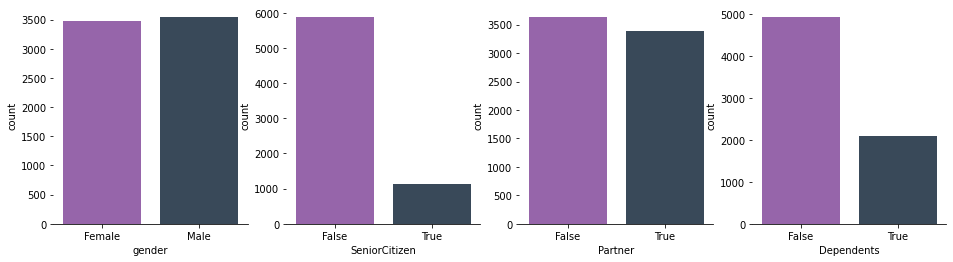

In [0]:
# Distribution on Demographic features
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(16, 4), sharex=False)
sns.despine(left=True)
sns.countplot(x='gender', data=df, palette=flatui, ax=ax1)
sns.countplot(x='SeniorCitizen', data=df, palette=flatui, ax=ax2)
sns.countplot(x='Partner', data=df, palette=flatui, ax=ax3)
sns.countplot(x='Dependents', data=df, palette=flatui, ax=ax4)
plt.show()

### Service

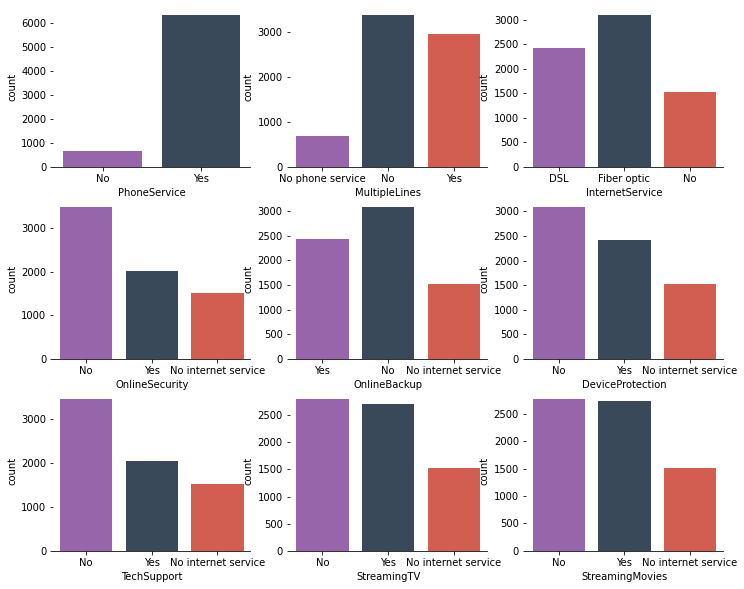

In [0]:
# Service preference
# phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
f, axes = plt.subplots(3, 3, figsize=(12, 10))
sns.despine(left=True)
sns.countplot(x='PhoneService', data=df,palette=flatui, ax=axes[0, 0])
sns.countplot(x='MultipleLines', data=df, palette=flatui, ax=axes[0, 1])
sns.countplot(x='InternetService', data=df, palette=flatui, ax=axes[0, 2])
sns.countplot(x='OnlineSecurity', data=df, palette=flatui, ax=axes[1, 0])
sns.countplot(x='OnlineBackup', data=df, palette=flatui, ax=axes[1, 1])
sns.countplot(x='DeviceProtection', data=df, palette=flatui, ax=axes[1, 2])
sns.countplot(x='TechSupport', data=df, palette=flatui, ax=axes[2, 0])
sns.countplot(x='StreamingTV', data=df, palette=flatui, ax=axes[2, 1])
sns.countplot(x='StreamingMovies', data=df, palette=flatui, ax=axes[2, 2])
plt.show()

#### 1) SeniorCitizen

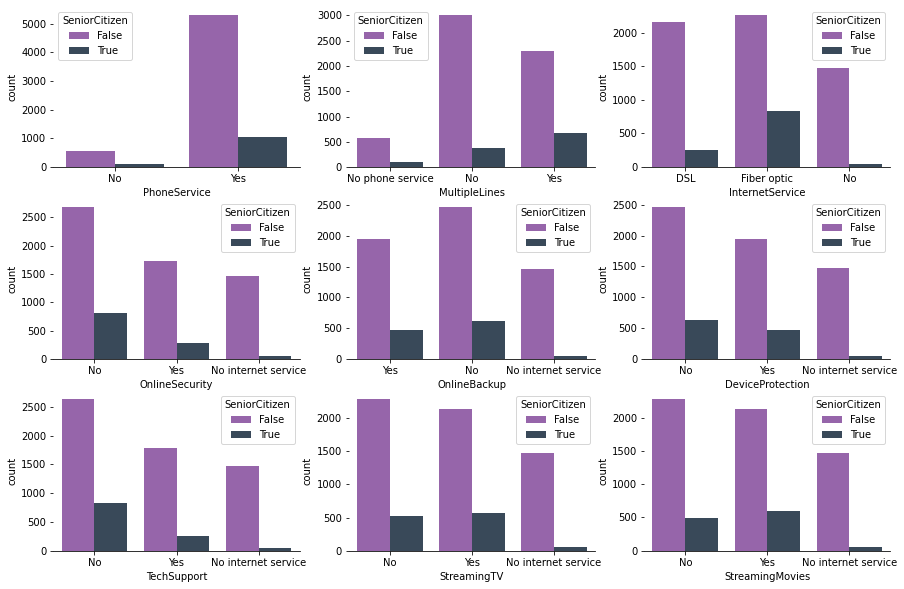

In [0]:
# Here I will visualize on four protection features above
# SeniorCitizen
f, axes = plt.subplots(3, 3, figsize=(15, 10))
sns.despine(left=True)
sns.countplot(x='PhoneService', data=df, hue="SeniorCitizen",palette=flatui, ax=axes[0, 0])
sns.countplot(x='MultipleLines', data=df, hue="SeniorCitizen",palette=flatui, ax=axes[0, 1])
sns.countplot(x='InternetService', data=df, hue="SeniorCitizen",palette=flatui, ax=axes[0, 2])
sns.countplot(x='OnlineSecurity', data=df, hue="SeniorCitizen",palette=flatui, ax=axes[1, 0])
sns.countplot(x='OnlineBackup', data=df, hue="SeniorCitizen",palette=flatui, ax=axes[1, 1])
sns.countplot(x='DeviceProtection', data=df, hue="SeniorCitizen",palette=flatui, ax=axes[1, 2])
sns.countplot(x='TechSupport', data=df, hue="SeniorCitizen",palette=flatui, ax=axes[2, 0])
sns.countplot(x='StreamingTV', data=df, hue="SeniorCitizen",palette=flatui, ax=axes[2, 1])
sns.countplot(x='StreamingMovies', data=df, hue="SeniorCitizen",palette=flatui, ax=axes[2, 2])
plt.show()

#### 2) Gender

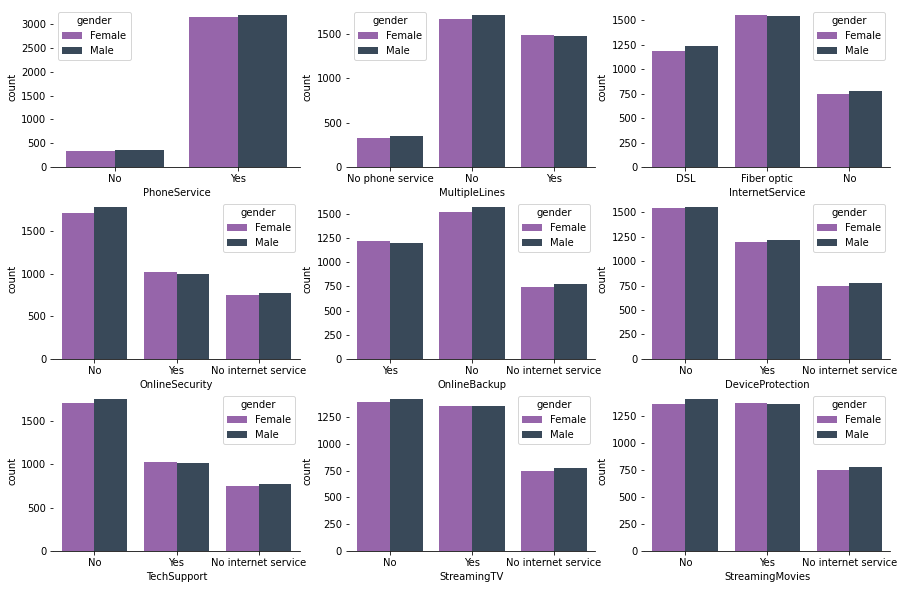

In [0]:
# Gender
f, axes = plt.subplots(3, 3, figsize=(15, 10))
sns.despine(left=True)
sns.countplot(x='PhoneService', data=df, hue="gender",palette=flatui, ax=axes[0, 0])
sns.countplot(x='MultipleLines', data=df, hue="gender",palette=flatui, ax=axes[0, 1])
sns.countplot(x='InternetService', data=df, hue="gender",palette=flatui, ax=axes[0, 2])
sns.countplot(x='OnlineSecurity', data=df, hue="gender",palette=flatui, ax=axes[1, 0])
sns.countplot(x='OnlineBackup', data=df, hue="gender",palette=flatui, ax=axes[1, 1])
sns.countplot(x='DeviceProtection', data=df, hue="gender",palette=flatui, ax=axes[1, 2])
sns.countplot(x='TechSupport', data=df, hue="gender",palette=flatui, ax=axes[2, 0])
sns.countplot(x='StreamingTV', data=df, hue="gender",palette=flatui, ax=axes[2, 1])
sns.countplot(x='StreamingMovies', data=df, hue="gender",palette=flatui, ax=axes[2, 2])
plt.show()

#### 3) Partner

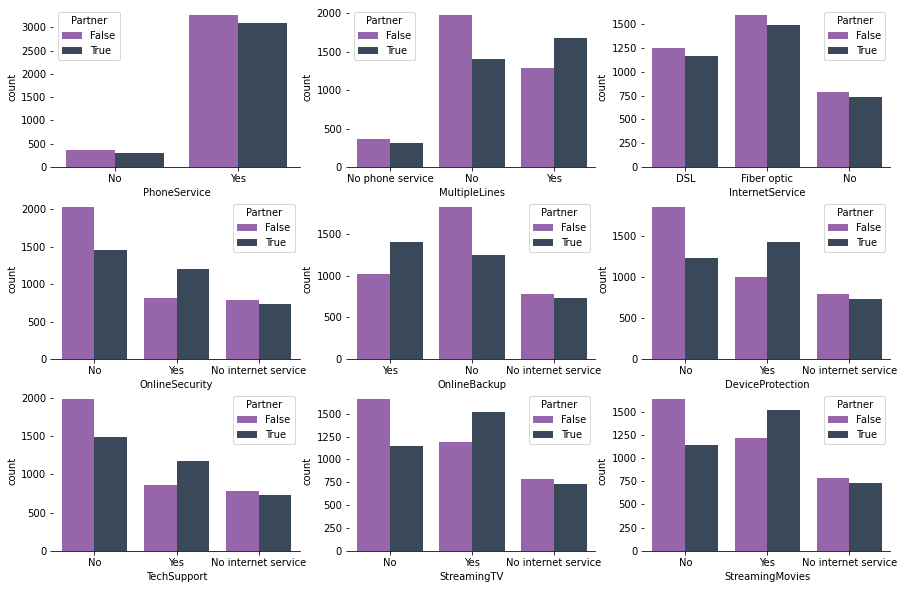

In [0]:
# Partner
f, axes = plt.subplots(3, 3, figsize=(15, 10))
sns.despine(left=True)
sns.countplot(x='PhoneService', data=df, hue="Partner",palette=flatui, ax=axes[0, 0])
sns.countplot(x='MultipleLines', data=df, hue="Partner",palette=flatui, ax=axes[0, 1])
sns.countplot(x='InternetService', data=df, hue="Partner",palette=flatui, ax=axes[0, 2])
sns.countplot(x='OnlineSecurity', data=df, hue="Partner",palette=flatui, ax=axes[1, 0])
sns.countplot(x='OnlineBackup', data=df, hue="Partner",palette=flatui, ax=axes[1, 1])
sns.countplot(x='DeviceProtection', data=df, hue="Partner",palette=flatui, ax=axes[1, 2])
sns.countplot(x='TechSupport', data=df, hue="Partner",palette=flatui, ax=axes[2, 0])
sns.countplot(x='StreamingTV', data=df, hue="Partner",palette=flatui, ax=axes[2, 1])
sns.countplot(x='StreamingMovies', data=df, hue="Partner",palette=flatui, ax=axes[2, 2])
plt.show()

#### 4) Dependents

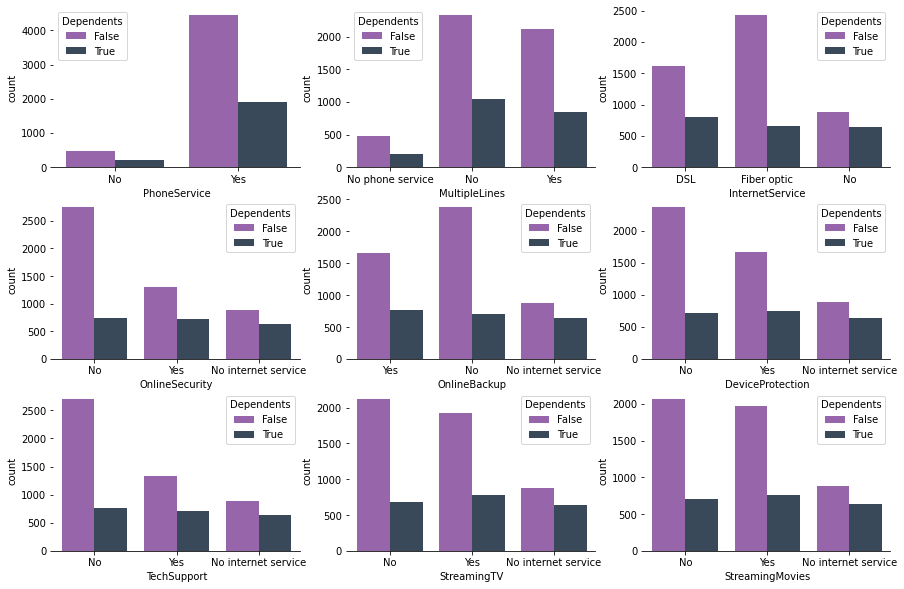

In [0]:
# Dependents
f, axes = plt.subplots(3, 3, figsize=(15, 10))
sns.despine(left=True)
sns.countplot(x='PhoneService', data=df, hue="Dependents",palette=flatui, ax=axes[0, 0])
sns.countplot(x='MultipleLines', data=df, hue="Dependents",palette=flatui, ax=axes[0, 1])
sns.countplot(x='InternetService', data=df, hue="Dependents",palette=flatui, ax=axes[0, 2])
sns.countplot(x='OnlineSecurity', data=df, hue="Dependents",palette=flatui, ax=axes[1, 0])
sns.countplot(x='OnlineBackup', data=df, hue="Dependents",palette=flatui, ax=axes[1, 1])
sns.countplot(x='DeviceProtection', data=df, hue="Dependents",palette=flatui, ax=axes[1, 2])
sns.countplot(x='TechSupport', data=df, hue="Dependents",palette=flatui, ax=axes[2, 0])
sns.countplot(x='StreamingTV', data=df, hue="Dependents",palette=flatui, ax=axes[2, 1])
sns.countplot(x='StreamingMovies', data=df, hue="Dependents",palette=flatui, ax=axes[2, 2])
plt.show()

### Account

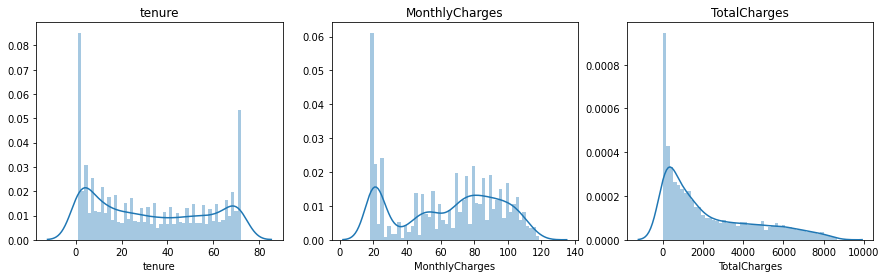

In [0]:
# Account
# how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
# See the distribution of numerical variables
plt.figure(1 , figsize = (15, 4))
fig = 0 
for f in ['tenure','MonthlyCharges','TotalCharges']:
  fig += 1
  plt.subplot(1,3,fig)
  sns.distplot(df[f], bins=50)
  plt.title(f)
plt.show()

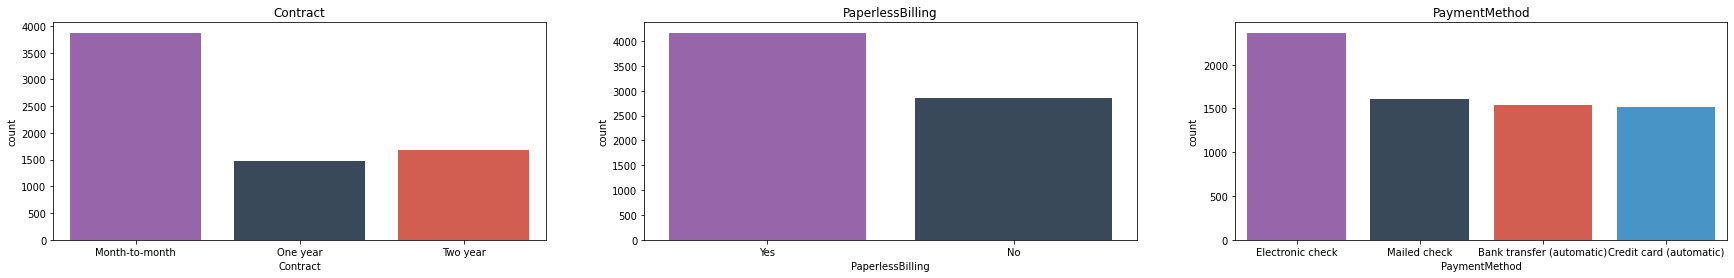

In [0]:
# contract, payment method, paperless billing
plt.figure(1 , figsize = (30, 4))
fig = 0 
for f in ['Contract','PaperlessBilling','PaymentMethod']:
  fig += 1
  plt.subplot(1,3,fig)
  sns.countplot(x=f, data=df, palette=flatui)
  plt.title(f)
plt.show()

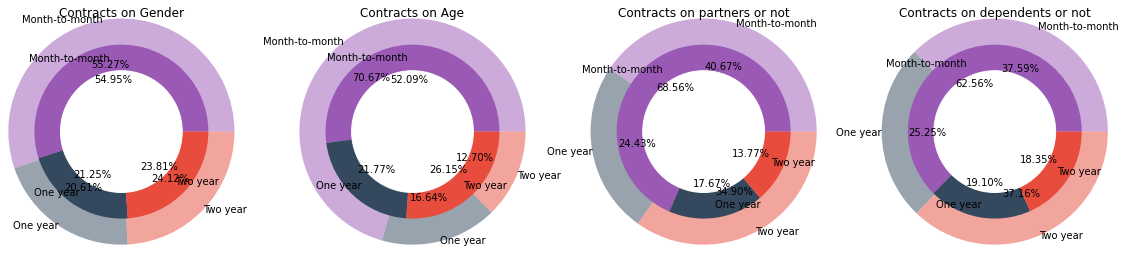

In [0]:
# Here, interested in Contract distribution on demographic features, use Pie chart to visualize it.
contract_female = df.loc[df['gender']=='Female'].groupby('Contract')['gender'].size()
contract_male = df.loc[df['gender']=='Male'].groupby('Contract')['gender'].size()
contract_Senior = df.loc[df['SeniorCitizen']==True].groupby('Contract')['SeniorCitizen'].size()
contract_NSenior = df.loc[df['SeniorCitizen']==False].groupby('Contract')['SeniorCitizen'].size()
contract_Partner = df.loc[df['Partner']==True].groupby('Contract')['Partner'].size()
contract_NPartner = df.loc[df['Partner']==False].groupby('Contract')['Partner'].size()
contract_Dependents = df.loc[df['Dependents']==True].groupby('Contract')['Dependents'].size()
contract_NDependents = df.loc[df['Dependents']==False].groupby('Contract')['Dependents'].size()

circle1=plt.Circle((0,0), 0.7, color='white')
circle2=plt.Circle((0,0), 0.7, color='white')
circle3=plt.Circle((0,0), 0.7, color='white')
circle4=plt.Circle((0,0), 0.7, color='white')

plt.figure(figsize=(20,4))

ax1 = plt.subplot2grid((1,4),(0,0))
plt.pie(contract_female, labels=contract_female.index, colors=flatui, radius=1.3, labeldistance=1, wedgeprops={'alpha':0.5}, autopct='%1.2f%%')
plt.pie(contract_male, labels=contract_male.index, colors=flatui, labeldistance=0.85, autopct='%1.2f%%')
plt.title('Contracts on Gender')
plt.gcf().gca().add_artist(circle1)

ax2 = plt.subplot2grid((1,4),(0,1))
plt.pie(contract_Senior, labels=contract_Senior.index, colors=flatui, radius=1.3, labeldistance=1, wedgeprops={'alpha':0.5}, autopct='%1.2f%%')
plt.pie(contract_NSenior, labels=contract_NSenior.index, colors=flatui, labeldistance=0.85, autopct='%1.2f%%')
plt.title('Contracts on Age')
plt.gcf().gca().add_artist(circle2)

ax3 = plt.subplot2grid((1,4),(0,2))
plt.pie(contract_Partner, labels=contract_Partner.index, colors=flatui, radius=1.3, labeldistance=1, wedgeprops={'alpha':0.5},autopct='%1.2f%%')
plt.pie(contract_NPartner, labels=contract_NPartner.index, colors=flatui, labeldistance=0.85, autopct='%1.2f%%')
plt.title('Contracts on partners or not')
plt.gcf().gca().add_artist(circle3)

ax4 = plt.subplot2grid((1,4),(0,3))
plt.pie(contract_Dependents, labels=contract_Dependents.index, colors=flatui, radius=1.3, labeldistance=1, wedgeprops={'alpha':0.5}, autopct='%1.2f%%')
plt.pie(contract_NDependents, labels=contract_NDependents.index, colors=flatui, labeldistance=0.85, autopct='%1.2f%%')
plt.title('Contracts on dependents or not')
plt.gcf().gca().add_artist(circle4)

plt.show()


### Multicollinearity

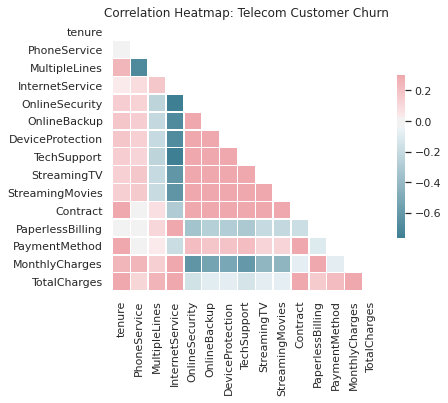

In [0]:
sns.set(style="white")

# generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)))

# compute the correlation matrix
corr = numeric_df.corr(method='pearson')

# generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# set up the matplotlib figure
f, ax = plt.subplots(figsize=(6,6))

# generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Correlation Heatmap: Telecom Customer Churn")
plt.show()

## 1.2 Churn Comparison

### Demographic

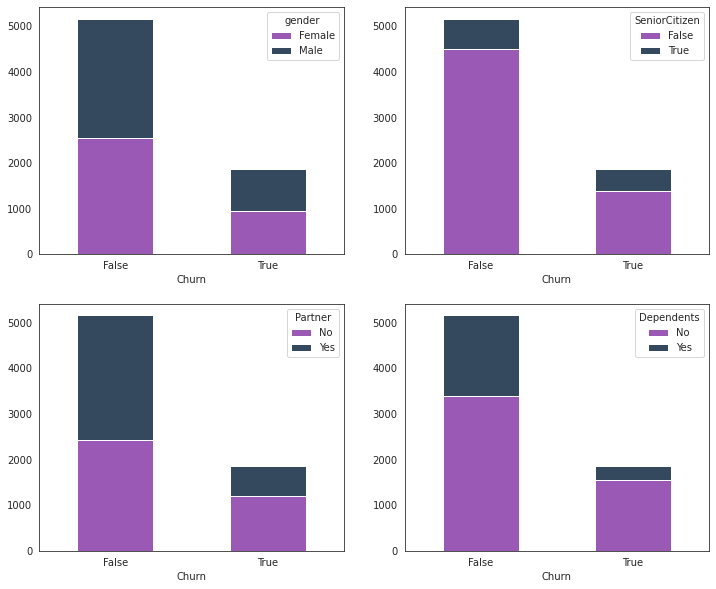

In [0]:
# save a colormap for future use
cmap = sns.color_palette(flatui)

fig, axes = plt.subplots(2, 2, figsize=(12, 10), sharex=False)
churn_gender = df.groupby(['Churn','gender']).size().unstack()
churn_gender.plot.bar(stacked=True, color=flatui, rot=0, ax=axes[0,0])

churn_senior = df.groupby(['Churn','SeniorCitizen']).size().unstack()
churn_senior.plot.bar(stacked=True, color=flatui, rot=0, ax=axes[0,1])

churn_partner = df.groupby(['Churn','Partner']).size().unstack()
churn_partner.plot.bar(stacked=True, color=flatui, rot=0, ax=axes[1,0])

churn_dependent = df.groupby(['Churn','Dependents']).size().unstack()
churn_dependent.plot.bar(stacked=True, color=flatui, rot=0, ax=axes[1,1])

### Service

#### 1) Tenure

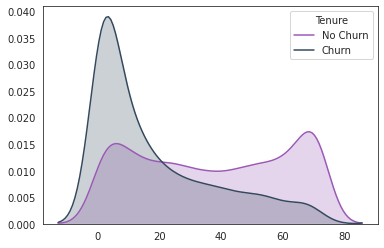

In [0]:
# density plot
sns.set_style("white")
p1=sns.kdeplot(df.loc[df.Churn == False]['tenure'], shade=True, color="#9b59b6")
p1=sns.kdeplot(df.loc[df.Churn == True]['tenure'], shade=True, color="#34495e")
plt.legend(title='Tenure', loc='upper right', labels=['No Churn', 'Churn'])

#### 2) Service Types

In [0]:
churn = df.loc[df.Churn==True]
no_churn = df.loc[df.Churn==False]

phone = churn.groupby('PhoneService')['Churn'].size()
phone1 = no_churn.groupby('PhoneService')['Churn'].size()
multiline = churn.groupby('MultipleLines')['Churn'].size() 
multiline1 = no_churn.groupby('MultipleLines')['Churn'].size()
internet = churn.groupby('InternetService')['Churn'].size()                 
internet1 = no_churn.groupby('InternetService')['Churn'].size() 
security = churn.groupby('OnlineSecurity')['Churn'].size()
security1 = no_churn.groupby('OnlineSecurity')['Churn'].size()
backup = churn.groupby('OnlineBackup')['Churn'].size()
backup1 = no_churn.groupby('OnlineBackup')['Churn'].size()
protect = churn.groupby('DeviceProtection')['Churn'].size()
protect1 = no_churn.groupby('DeviceProtection')['Churn'].size()
support = churn.groupby('TechSupport')['Churn'].size()
support1 = no_churn.groupby('TechSupport')['Churn'].size()
streamtv = churn.groupby('StreamingTV')['Churn'].size()
streamtv1 = no_churn.groupby('StreamingTV')['Churn'].size()
movie =  churn.groupby('StreamingMovies')['Churn'].size()
movie1 =  no_churn.groupby('StreamingMovies')['Churn'].size()

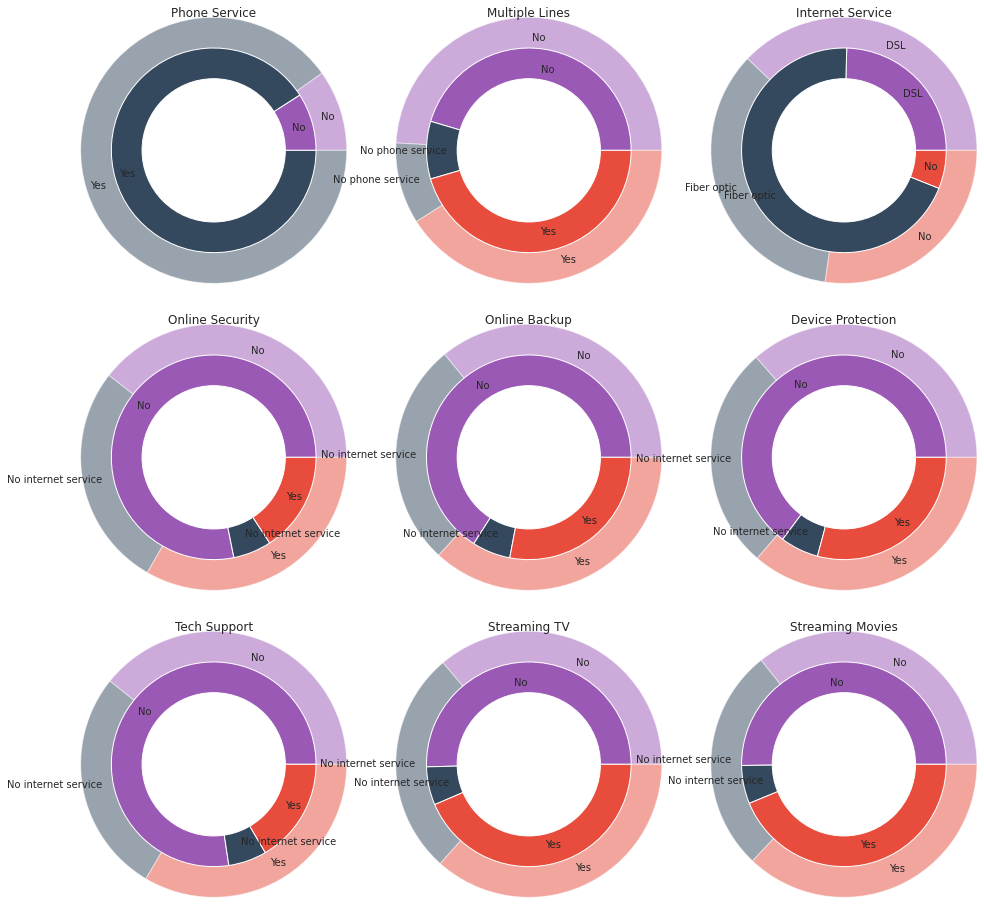

In [0]:
# plot donuts cuz I'd love to have some now
circle1=plt.Circle((0,0), 0.7, color='white')
circle2=plt.Circle((0,0), 0.7, color='white')
circle3=plt.Circle((0,0), 0.7, color='white')
circle4=plt.Circle((0,0), 0.7, color='white')
circle5=plt.Circle((0,0), 0.7, color='white')
circle6=plt.Circle((0,0), 0.7, color='white')
circle7=plt.Circle((0,0), 0.7, color='white')
circle8=plt.Circle((0,0), 0.7, color='white')
circle9=plt.Circle((0,0), 0.7, color='white')

plt.figure(figsize=(16,16))

ax1 = plt.subplot2grid((3,3),(0,0))
plt.pie(phone1, labels=phone1.index, colors=flatui, radius=1.3, labeldistance=0.85, wedgeprops={'alpha':0.5})
plt.pie(phone, labels=phone.index, colors=flatui, labeldistance=0.8)
plt.title('Phone Service')
plt.gcf().gca().add_artist(circle1)

ax2 = plt.subplot2grid((3,3),(0,1))
plt.pie(multiline1, labels=multiline1.index, colors=flatui, radius=1.3, labeldistance=0.85, wedgeprops={'alpha':0.5})
plt.pie(multiline, labels=multiline.index, colors=flatui, labeldistance=0.8)
plt.title('Multiple Lines')
plt.gcf().gca().add_artist(circle2)

ax3 = plt.subplot2grid((3,3),(0,2))
plt.pie(internet1, labels=internet1.index, colors=flatui, radius=1.3, labeldistance=0.85, wedgeprops={'alpha':0.5})
plt.pie(internet, labels=internet.index, colors=flatui, labeldistance=0.8)
plt.title('Internet Service')
plt.gcf().gca().add_artist(circle3)

ax4 = plt.subplot2grid((3,3),(1,0))
plt.pie(security1, labels=security1.index, colors=flatui, radius=1.3, labeldistance=0.85, wedgeprops={'alpha':0.5})
plt.pie(security, labels=security.index, colors=flatui, labeldistance=0.8)
plt.title('Online Security')
plt.gcf().gca().add_artist(circle4)

ax5 = plt.subplot2grid((3,3),(1,1))
plt.pie(backup1, labels=backup1.index, colors=flatui, radius=1.3, labeldistance=0.85, wedgeprops={'alpha':0.5})
plt.pie(backup, labels=backup.index, colors=flatui, labeldistance=0.8)
plt.title('Online Backup')
plt.gcf().gca().add_artist(circle5)

ax6 = plt.subplot2grid((3,3),(1,2))
plt.pie(protect1, labels=protect1.index, colors=flatui, radius=1.3, labeldistance=0.85, wedgeprops={'alpha':0.5})
plt.pie(protect, labels=protect.index, colors=flatui, labeldistance=0.8)
plt.title('Device Protection')
plt.gcf().gca().add_artist(circle6)

ax7 = plt.subplot2grid((3,3),(2,0))
plt.pie(support1, labels=support1.index, colors=flatui, radius=1.3, labeldistance=0.85, wedgeprops={'alpha':0.5})
plt.pie(support, labels=support.index, colors=flatui, labeldistance=0.8)
plt.title('Tech Support')
plt.gcf().gca().add_artist(circle7)

ax8 = plt.subplot2grid((3,3),(2,1))
plt.pie(streamtv1, labels=streamtv1.index, colors=flatui, radius=1.3, labeldistance=0.85, wedgeprops={'alpha':0.5})
plt.pie(streamtv, labels=streamtv.index, colors=flatui, labeldistance=0.8)
plt.title('Streaming TV')
plt.gcf().gca().add_artist(circle8)

ax9 = plt.subplot2grid((3,3),(2,2))
plt.pie(movie1, labels=movie1.index, colors=flatui, radius=1.3, labeldistance=0.85, wedgeprops={'alpha':0.5})
plt.pie(movie, labels=movie.index, colors=flatui, labeldistance=0.8)
plt.title('Streaming Movies')
plt.gcf().gca().add_artist(circle9)

plt.show()

### Account

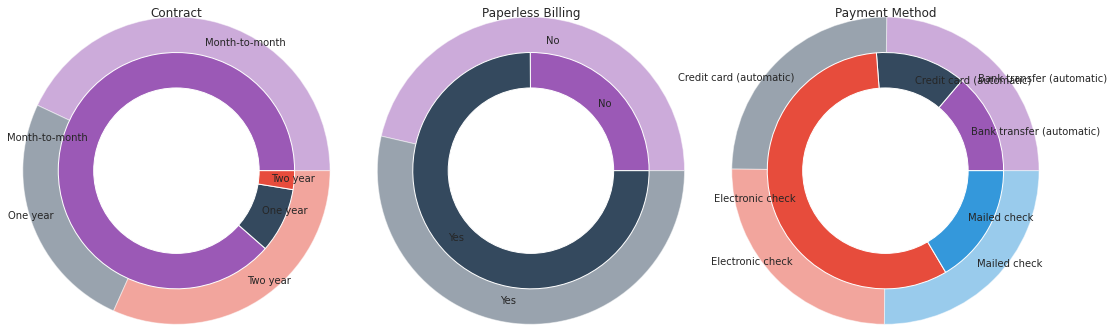

In [0]:
contract = churn.groupby('Contract')['Churn'].size()
contract1 = no_churn.groupby('Contract')['Churn'].size()
billing = churn.groupby('PaperlessBilling')['Churn'].size()
billing1 = no_churn.groupby('PaperlessBilling')['Churn'].size()
payment = churn.groupby('PaymentMethod')['Churn'].size()
payment1 = no_churn.groupby('PaymentMethod')['Churn'].size()

circle1=plt.Circle((0,0), 0.7, color='white')
circle2=plt.Circle((0,0), 0.7, color='white')
circle3=plt.Circle((0,0), 0.7, color='white')

plt.figure(figsize=(18,6))

ax1 = plt.subplot2grid((1,3),(0,0))
plt.pie(contract1, labels=contract1.index, colors=flatui, radius=1.3, labeldistance=0.85, wedgeprops={'alpha':0.5})
plt.pie(contract, labels=contract.index, colors=flatui, labeldistance=0.8)
plt.title('Contract')
plt.gcf().gca().add_artist(circle1)

ax2 = plt.subplot2grid((1,3),(0,1))
plt.pie(billing1, labels=billing1.index, colors=flatui, radius=1.3, labeldistance=0.85, wedgeprops={'alpha':0.5})
plt.pie(billing, labels=billing.index, colors=flatui, labeldistance=0.8)
plt.title('Paperless Billing')
plt.gcf().gca().add_artist(circle2)

ax3 = plt.subplot2grid((1,3),(0,2))
plt.pie(payment1, labels=payment1.index, colors=flatui, radius=1.3, labeldistance=0.85, wedgeprops={'alpha':0.5})
plt.pie(payment, labels=payment.index, colors=flatui, labeldistance=0.8)
plt.title('Payment Method')
plt.gcf().gca().add_artist(circle3)

plt.show()

#### Charges

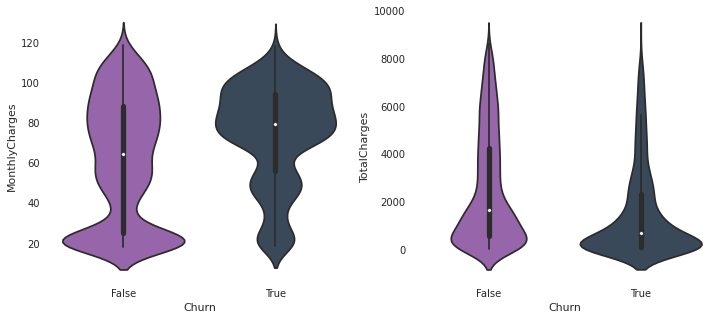

In [0]:
# violin plot for the charges
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=False)
sns.set_style("white")
sns.violinplot(x=df.Churn, y=df.MonthlyCharges, palette=cmap, order=[False, True], ax=axes[0])
sns.violinplot(x=df.Churn, y=df.TotalCharges, palette=cmap, order=[False, True], ax=axes[1])

# Section 2: Primary Task

## 2.1 Pre-processing

### Features & Label

In [0]:
# select 20% samples to build a training and a held-out test set
test_set = df.sample(round(df.shape[0]*0.2))
training_set = df.drop(test_set.index)
training_set.shape

(5626, 20)

### Train-test-split

In [0]:
# manually set x_train, y_train, x_test, y_test for the final held-out test
# train set
label = training_set['Churn']
# remove attributes for fairness audit from the feature set
features = training_set.drop(columns=['Churn','gender','SeniorCitizen','Partner','Dependents'])
features = pd.get_dummies(features)

# test set
test_label = test_set['Churn']
test_set_1 = test_set.copy()
test_features = test_set.drop(columns=['Churn','gender','SeniorCitizen','Partner','Dependents'])
test_features = pd.get_dummies(test_features)

In [0]:
# feature set with only service info
features2 = training_set.drop(columns=['Churn','gender','SeniorCitizen','Partner','Dependents','Contract','PaperlessBilling','PaymentMethod','MonthlyCharges','TotalCharges'])
features2 = pd.get_dummies(features2)

# feature set with only account info
features3 = training_set[['Contract','PaperlessBilling','PaymentMethod','MonthlyCharges','TotalCharges']].copy()
features3 = pd.get_dummies(features3)

## 2.2 Model Training

### Define Modeling Functions

In [0]:
def k_folds_model(X, y, classifiers, metrics, kf_num):
  
  # use dataframe to store outcomes
  records = []

  # iterate over each classifier
  for classifier_name, classifier in classifiers.items():

    kf = KFold(n_splits=kf_num, shuffle=True)

    # split the training set into k folds and build models through cross-validation
    for fold_num, (train_index, test_index) in enumerate(kf.split(X, y)):

      fold_record = {'Classifier':classifier_name,
                     'Fold_num': fold_num}

      # split train set and test set within each fold
      X_train = X.iloc[train_index]
      X_test = X.iloc[test_index]
      y_train = y.iloc[train_index]
      y_test = y.iloc[test_index]

      # train the model
      model = classifier.fit(X_train, y_train)
      y_pred = model.predict(X_test)

      # calculate the metrics
      for (metric_name, metric) in metrics.items():
        result = metric(y_test, y_pred)
        fold_record[metric_name] = round(result, 4)

      # ignore UndefinedMetricWarning caused by ill-preforming single nominal features
      warnings.filterwarnings("ignore")

      # store the results of k folds into a dataframe
      records.append(fold_record)
    records_df = pd.DataFrame(records)
  
  return records_df

In [0]:
def pca_pipe(X, y, classifiers, metrics, n_compo, scl):
  records = []
  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
  for classifier_name, classifier in classifiers.items():
    clf_record = {'Classifier': classifier_name}
    clf = classifier
    pca = PCA(n_components=n_compo)
    pipe = Pipeline(steps=[('Scale',scl), ('PCA',pca), ('clf',clf)])
    pipe.fit(x_train, y_train)
    y_pred = pipe.predict(x_test)
    for (metric_name, metric) in metrics.items():
      result = metric(y_test, y_pred)
      clf_record[metric_name] = round(result, 2)
    records.append(clf_record)
    records_df = pd.DataFrame(records)
  
  return records_df

In [0]:
def grid_search(X, y, estimator, test_size, param_grid, metrics, scoring, cv, matrix=True):

  # split train and test set
  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=123)

  # perform grid search and find the best estimator
  grid_search = GridSearchCV(estimator = estimator, param_grid = param_grid, scoring=scoring, cv=cv)
  grid_search.fit(x_train, y_train)
  
  # predict using the best set of parameters
  best_grid = grid_search.best_estimator_
  y_pred = best_grid.predict(x_test)

  # print results
  print(f"Best Parameters: {grid_search.best_params_}")
  for (metric_name, metric) in metrics.items():
    result = round(metric(y_test, y_pred),4)
    print(f"{metric_name}: {result}")

  if matrix == True:
    conf_matrix = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(conf_matrix, ["No Churn", "Churn"]).plot(values_format='.4g')
    plt.show()

In [0]:
def pca_grid_search(x_train, x_test, y_train, y_test, estimator, param_grid, metrics, scoring, cv, matrix=True):

  # perform grid search and find the best estimator
  grid_search = GridSearchCV(estimator = estimator, param_grid = param_grid, scoring=scoring, cv=cv)
  grid_search.fit(x_train, y_train)
  
  # predict using the best set of parameters
  best_grid = grid_search.best_estimator_
  y_pred = best_grid.predict(x_test)

  # print results
  print(f"Best Parameters: {grid_search.best_params_}")
  for (metric_name, metric) in metrics.items():
    result = round(metric(y_test, y_pred),4)
    print(f"{metric_name}: {result}")

  if matrix == True:
    conf_matrix = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(conf_matrix, ["No Churn", "Churn"]).plot(values_format='.4g')
    plt.show()

### K-fold Classifier Comparison

In [0]:
# define classifiers and metrics
classifiers = {
    "Decision Tree": DecisionTreeClassifier(criterion="entropy", random_state=123),
    "Logistic Regression": LogisticRegression(penalty="none", solver="lbfgs", multi_class='ovr', max_iter=10000, random_state=123),
    "Gaussian NB": GaussianNB(),
    "Bernoulli NB": BernoulliNB(),
    "Complement NB": ComplementNB(), 
    "Multinomial NB": MultinomialNB(),
    "Random Forest":RandomForestClassifier(n_estimators=100),
    "Linear SVM": LinearSVC(),
    "XGBoost": XGBClassifier(random_state=123),
    "K-nearest Neighbors": KNeighborsClassifier(),
    "Multilayer Perceptron": MLPClassifier(random_state=123)
}

metrics = {
    "Accuracy" : lambda y_test,y_pred: 100*accuracy_score(y_test,y_pred),
    "Kappa"    : cohen_kappa_score,
    "Precision": precision_score,
    "Recall"   : recall_score,
    "F-Score"  : f1_score
}

# train the models
k_fold_classifiers = k_folds_model(features, label, classifiers, metrics, 10)

# calculate the mean result of the metrics
result = k_fold_classifiers.groupby('Classifier')[['Accuracy','Kappa',"Precision","Recall","F-Score"]].mean()
result.sort_values(by=['Accuracy'], ascending=False,inplace=True)
result.round(2)

,Accuracy,Kappa,Precision,Recall,F-Score
Classifier,,,,,
XGBoost,80.23,0.46,0.66,0.53,0.59
Logistic Regression,80.06,0.46,0.65,0.54,0.59
Random Forest,78.69,0.42,0.63,0.50,0.55
K-nearest Neighbors,75.95,0.34,0.56,0.43,0.49
Multilayer Perceptron,74.21,0.39,0.58,0.61,0.56
Decision Tree,72.96,0.31,0.49,0.51,0.50
Bernoulli NB,70.97,0.40,0.47,0.82,0.60
Gaussian NB,68.86,0.37,0.45,0.84,0.59
Multinomial NB,68.52,0.34,0.45,0.75,0.56


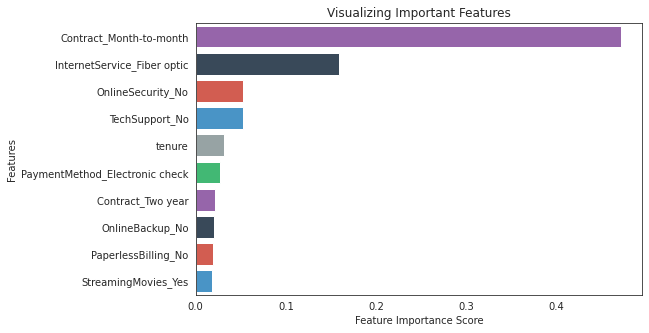

In [0]:
clf = XGBClassifier(random_state=123)
clf.fit(features, label)
feature_imp = pd.Series(clf.feature_importances_,index=x_train.columns).sort_values(ascending=False)

# Creating a bar plot, displaying only the top k features
k = 10
plt.figure(figsize=(8,5))
sns.set_style("white")
sns.barplot(x=feature_imp[:k], y=feature_imp.index[:k], palette=cmap)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
#plt.legend()
plt.show()

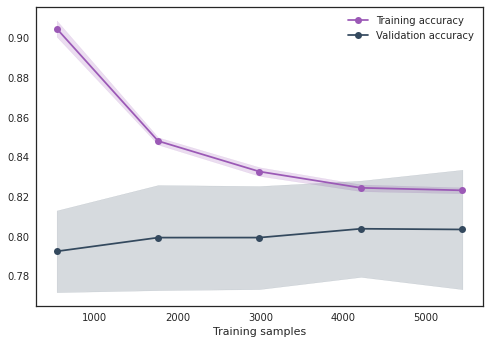

In [0]:
from sklearn.model_selection import learning_curve
estimator = XGBClassifier(random_state=123)
# estimotor = LogisticRegression(penalty="none", solver="lbfgs", multi_class='ovr', max_iter=10000, random_state=123)

train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, features, label, cv=30, n_jobs=1,
                       train_sizes=np.linspace(.1, 1.0, 5),
                       return_times=True)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.plot(train_sizes,np.mean(train_scores, axis=1), \
          marker='o', label='Training accuracy', color="#9b59b6")
plt.plot(train_sizes,np.mean(test_scores, axis=1), \
          marker='o', label='Validation accuracy', color="#34495e")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.2,
                         color="#9b59b6")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                      test_scores_mean + test_scores_std, alpha=0.2,
                      color="#34495e")
plt.xlabel('Training samples')
plt.legend()

In [0]:
# model with only service features
k_fold_classifiers = k_folds_model(features2, label, classifiers, metrics, 10)

# calculate the mean result of the metrics
result = k_fold_classifiers.groupby('Classifier')[['Accuracy','Kappa',"Precision","Recall","F-Score"]].mean()
result.sort_values(by=['Accuracy'], ascending=False,inplace=True)
result.round(2)

,Accuracy,Kappa,Precision,Recall,F-Score
Classifier,,,,,
Logistic Regression,79.56,0.43,0.65,0.50,0.56
XGBoost,79.54,0.43,0.65,0.50,0.56
Multilayer Perceptron,79.35,0.43,0.65,0.50,0.56
Linear SVM,76.59,0.39,0.62,0.52,0.55
K-nearest Neighbors,76.59,0.38,0.57,0.51,0.54
Random Forest,75.40,0.36,0.54,0.50,0.52
Decision Tree,75.06,0.34,0.53,0.48,0.51
Multinomial NB,73.21,0.40,0.50,0.72,0.59
Complement NB,71.53,0.38,0.48,0.75,0.58


In [0]:
# model with only account features
k_fold_classifiers = k_folds_model(features3, label, classifiers, metrics, 10)

# calculate the mean result of the metrics
result = k_fold_classifiers.groupby('Classifier')[['Accuracy','Kappa',"Precision","Recall","F-Score"]].mean()
result.sort_values(by=['Accuracy'], ascending=False,inplace=True)
result.round(2)

,Accuracy,Kappa,Precision,Recall,F-Score
Classifier,,,,,
XGBoost,79.31,0.43,0.65,0.49,0.56
Logistic Regression,78.80,0.41,0.63,0.48,0.55
Random Forest,76.52,0.37,0.57,0.48,0.52
K-nearest Neighbors,75.77,0.33,0.56,0.43,0.48
Decision Tree,72.40,0.29,0.48,0.48,0.48
Bernoulli NB,72.24,0.37,0.49,0.69,0.57
Gaussian NB,70.49,0.38,0.47,0.78,0.58
Multilayer Perceptron,69.13,0.31,0.54,0.58,0.50
Multinomial NB,64.52,0.28,0.41,0.75,0.53


In [0]:
# selected subset
features4 = training_set[['tenure','InternetService','OnlineSecurity','Contract','PaperlessBilling','PaymentMethod','MonthlyCharges','StreamingMovies']].copy()
features4 = pd.get_dummies(features4)

# model with handpicked features
k_fold_classifiers = k_folds_model(features4, label, classifiers, metrics, 10)

# calculate the mean result of the metrics
result = k_fold_classifiers.groupby('Classifier')[['Accuracy','Kappa',"Precision","Recall","F-Score"]].mean()
result.sort_values(by=['Accuracy'], ascending=False,inplace=True)
result.round(2)

,Accuracy,Kappa,Precision,Recall,F-Score
Classifier,,,,,
Logistic Regression,79.75,0.45,0.65,0.52,0.58
XGBoost,79.75,0.44,0.66,0.51,0.57
Multilayer Perceptron,79.52,0.44,0.66,0.52,0.56
Random Forest,77.44,0.39,0.59,0.50,0.54
K-nearest Neighbors,76.63,0.38,0.57,0.50,0.53
Decision Tree,73.69,0.33,0.51,0.51,0.51
Bernoulli NB,73.46,0.41,0.50,0.75,0.60
Multinomial NB,73.29,0.41,0.50,0.74,0.60
Complement NB,72.20,0.40,0.49,0.78,0.60


### PCA Transformation

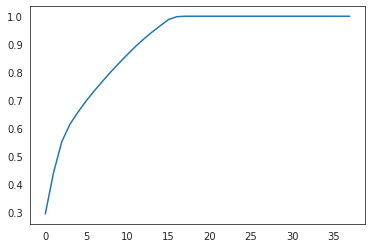

In [0]:
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=123)

# use PCA to reduce number of dimensions
x_train = StandardScaler().fit_transform(x_train)
# the shape of training set is (5626, 38)
pca = PCA(n_components=38)
pca.fit_transform(x_train)

# plot the explained_variance_ratio to find the best number for components
pc_vs_variance = np.cumsum(pca.explained_variance_ratio_)
pc_vs_variance
plt.plot(pc_vs_variance)

In [0]:
classifiers = {
    "Decision Tree": DecisionTreeClassifier(criterion="entropy", random_state=123),
    "Logistic Regression": LogisticRegression(penalty="none", solver="lbfgs", multi_class='ovr', max_iter=10000, random_state=123),
    "Gaussian NB": GaussianNB(),
    "Random Forest":RandomForestClassifier(n_estimators=100),
    "Linear SVM": LinearSVC(),
    "XGBoost": XGBClassifier(random_state=123),
    "K-nearest Neighbors": KNeighborsClassifier(),
    "Multilayer Perceptron": MLPClassifier(random_state=123)
}

scl = StandardScaler()
result = pca_pipe(features, label, classifiers, metrics, 17, scl)
result.sort_values(by=['Accuracy'], ascending=False,inplace=True)
result

,Classifier,Accuracy,Kappa,Precision,Recall,F-Score
5,XGBoost,81.08,0.44,0.66,0.48,0.56
1,Logistic Regression,80.99,0.45,0.65,0.51,0.57
4,Linear SVM,80.99,0.45,0.65,0.50,0.57
7,Multilayer Perceptron,79.57,0.41,0.61,0.49,0.54
2,Gaussian NB,79.13,0.46,0.57,0.65,0.61
3,Random Forest,78.95,0.38,0.60,0.44,0.51
6,K-nearest Neighbors,76.82,0.37,0.53,0.52,0.52
0,Decision Tree,76.20,0.36,0.52,0.53,0.52


#### PCA & Grid Search

Best Parameters: {'penalty': 'none'}
Accuracy: 81.2611
Kappa: 0.501
Precision: 0.722
Recall: 0.5472
F-Score: 0.6225


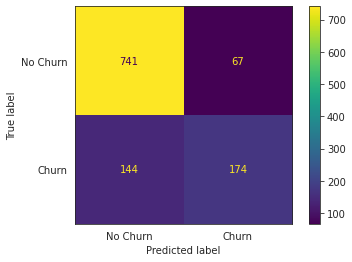

In [0]:
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=123)
pca = PCA(n_components=17)
pca.fit(x_train)
x_train_2 = pca.transform(x_train)
x_test_2 = pca.transform(x_test)

param_grid = {
    'penalty': ['l1','l2','elasticnet','none']
}


estimator = LogisticRegression(random_state=123)

pca_grid_search(x_train_2, x_test_2, y_train, y_test, estimator, param_grid, metrics, 'accuracy', 20, matrix=True)

Best Parameters: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 140}
Accuracy: 80.1066
Kappa: 0.4609
Precision: 0.7098
Recall: 0.5
F-Score: 0.5867


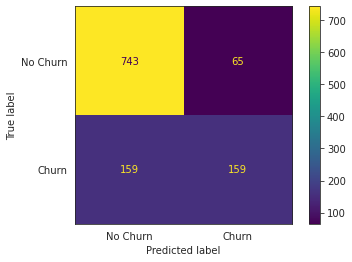

In [0]:
param_grid = {
    'max_depth': range(2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

estimator = XGBClassifier(random_state=123)
pca_grid_search(x_train_2, x_test_2, y_train, y_test, estimator, param_grid, metrics, 'accuracy', 20, matrix=True)

### Grid Search

#### 1) Decision Tree

Best Parameters: {'criterion': 'gini', 'max_depth': 4, 'min_impurity_decrease': 0.0, 'splitter': 'best'}
Accuracy: 78.7744
Kappa: 0.3775
Precision: 0.5962
Recall: 0.4444
F: 0.5092


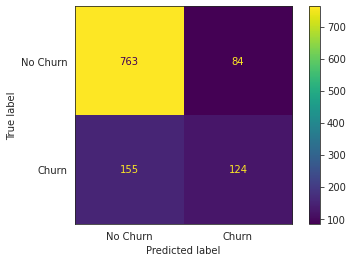

In [0]:
param_grid = {
    'criterion': ['gini', 'entropy'], 
    'splitter': ['best', 'random'], 
    'max_depth': range(2,15,1), 
    'min_impurity_decrease': [0.0, 0.1, 0.2]
}

metrics = {
    "Accuracy" : lambda y_test,y_pred: 100*accuracy_score(y_test,y_pred),
    "Kappa"    : cohen_kappa_score,
    "Precision": precision_score,
    "Recall"   : recall_score,
    "F"        : f1_score
}

estimator = DecisionTreeClassifier(random_state=123)
grid_search(features, label, estimator, 0.2, param_grid, metrics, 'accuracy', 20)

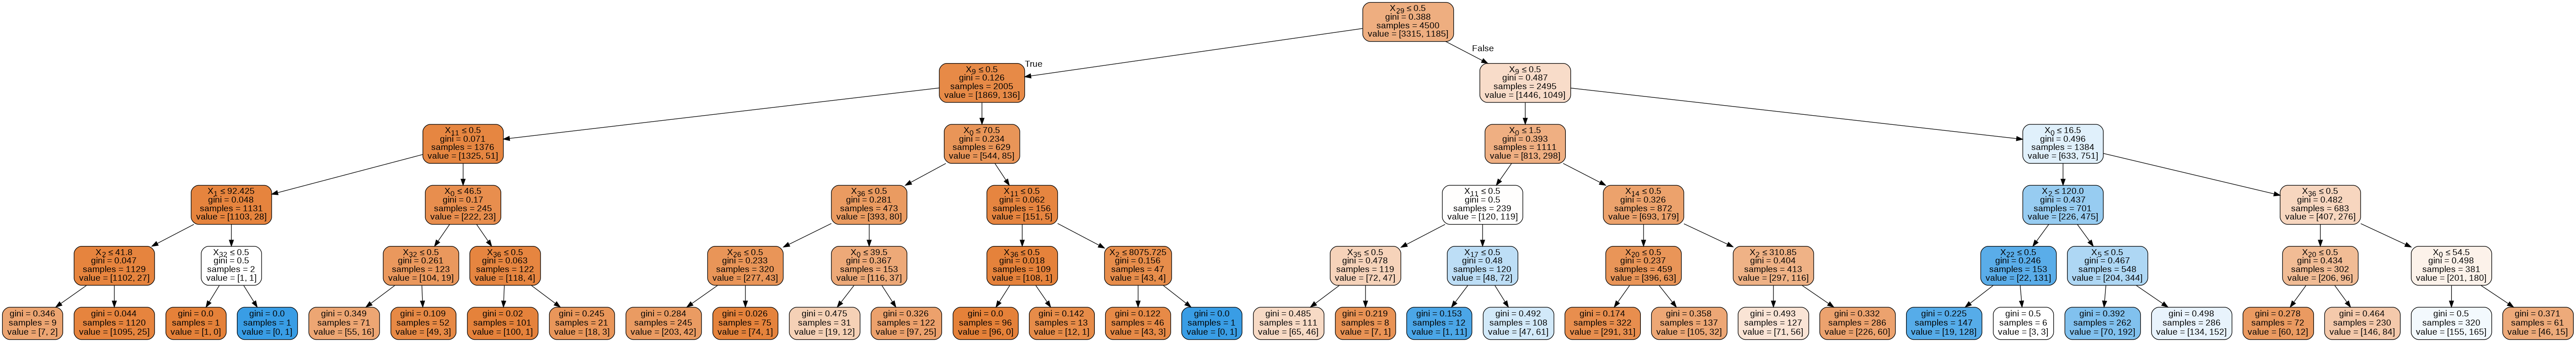

In [0]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

# build the decision tree model using the best set of parameters
clf = DecisionTreeClassifier(criterion="gini", max_depth = 5, min_impurity_decrease = 0.0, splitter='best')
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=1)
clf = clf.fit(x_train,y_train)

# plot the decision tree
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Customer Churn.png')
Image(graph.create_png())

#### 2) Logistic Regresion

Best Parameters: {'penalty': 'none'}
Accuracy: 80.9947
Kappa: 0.4491
Precision: 0.6498
Recall: 0.5054
F: 0.5685


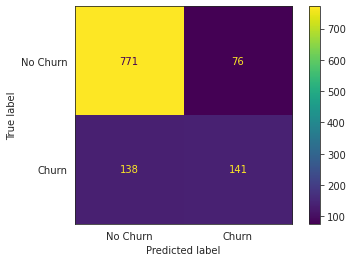

In [0]:
param_grid = {
    'penalty': ['l1','l2','elasticnet','none']
}


estimator = LogisticRegression(random_state=123)
grid_search(features, label, estimator, 0.2, param_grid, metrics, 'accuracy', 20)

#### 3) KNN

Best Parameters: {'algorithm': 'ball_tree', 'leaf_size': 20, 'n_neighbors': 6, 'weights': 'uniform'}
Accuracy: 77.6199
Kappa: 0.2925
Precision: 0.5882
Recall: 0.3226
F: 0.4167


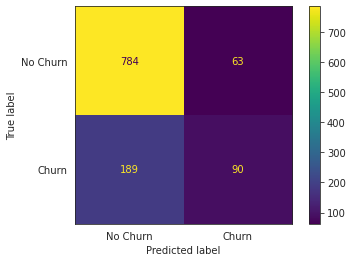

In [0]:
param_grid = {
    'leaf_size': range(20,40,10),
    'n_neighbors': [3, 4, 5, 6, 7],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'weights': ['uniform', 'distance']
}

estimator = KNeighborsClassifier()
grid_search(features, label, estimator, 0.2, param_grid, metrics, 'accuracy', 20)

#### 4) Random Forest

Best Parameters: {'max_depth': 8, 'max_features': 4, 'n_estimators': 200}
Accuracy: 80.9059
Kappa: 0.4444
Precision: 0.6495
Recall: 0.4982
F: 0.5639


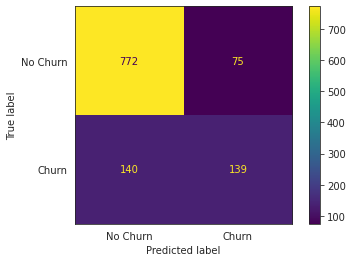

In [0]:
param_grid = {
    'max_depth': range(2, 10, 2),
    'max_features': [2, 3, 4, 5],
    'n_estimators': range(50,300,50)
}

estimator = RandomForestClassifier(random_state=123)
grid_search(features, label, estimator, 0.2, param_grid, metrics, 'accuracy', 20)

#### 5) XGBoost

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 60}
Accuracy: 81.2611
Kappa: 0.4561
Precision: 0.6574
Recall: 0.509
F: 0.5737


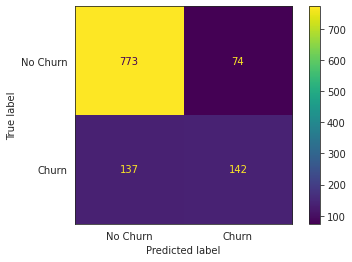

In [0]:
param_grid = {
    'max_depth': range(2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

estimator = XGBClassifier(random_state=123)
grid_search(features, label, estimator, 0.2, param_grid, metrics, 'accuracy', 20)

#### 6) Multilayer perceptron

In [0]:
param_grid = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'solver': ['sgd', 'adam'],
    'activation': ['tanh', 'relu'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
    'max_iter': [100, 200, 300]
}

estimator = MLPClassifier()
grid_search(features, label, estimator, 0.2, param_grid, metrics, 'accuracy', 20)

### Final Model & Held-out Test

Accuracy: 80.73
Kappa: 0.47
Precision: 0.67
Recall: 0.54
F-Score: 0.59


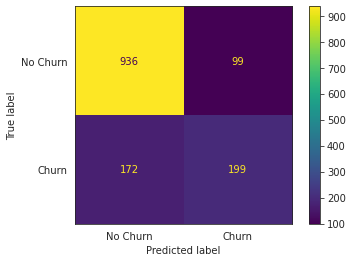

In [0]:
# train the model
final_classifier = XGBClassifier(learning_rate= 0.1, max_depth= 3, n_estimators= 60, random_state=123)
model = final_classifier.fit(features, label)
y_pred = model.predict(test_features)
probs = model.predict_proba(test_features)

# calculate false positive and true positive rates
fpr, tpr, thresholds = roc_curve(test_label, probs[:,1], pos_label=True)
roc_auc = auc(fpr, tpr)

# calculate precision and recall
recall, precision, thresholds = precision_recall_curve(test_label,probs[:,1], pos_label=True)

# calculate the metrics
for (metric_name, metric) in metrics.items():
  result = metric(test_label, y_pred)
  print(f"{metric_name}: {round(result, 2)}")

conf_matrix = confusion_matrix(test_label, y_pred)
ConfusionMatrixDisplay(conf_matrix, ["No Churn", "Churn"]).plot(values_format='.4g')
plt.show()

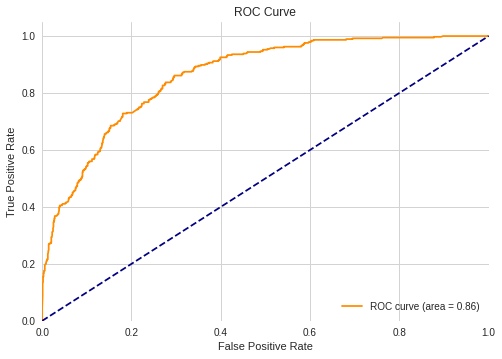

In [0]:
plt.figure()
ax = plt.axes()
plt.style.use('seaborn')
plt.plot(fpr, tpr, color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.grid(color='lightgrey')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
ax.set_facecolor("w")
plt.show()

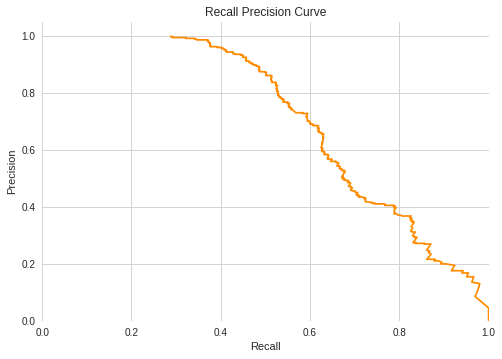

In [0]:
plt.figure()
ax = plt.axes()
plt.style.use('seaborn')
plt.plot(recall, precision, color='darkorange', )
plt.grid(color='lightgrey')
ax.set_facecolor("w")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Recall Precision Curve')
plt.show()

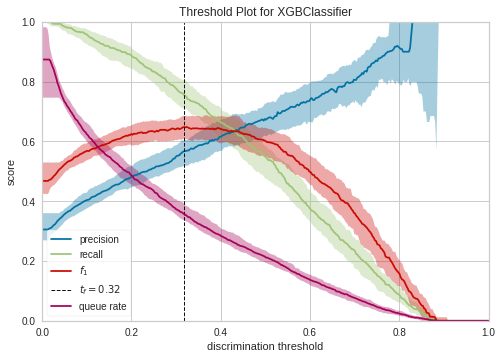

In [0]:
from yellowbrick.classifier import DiscriminationThreshold

visualizer = DiscriminationThreshold(model)
visualizer.fit(features,label)
visualizer.poof()

# Section 3: Fairness Audit

## 3.1 Final Model Summary & Audit preparation

In [0]:
print(metrics.classification_report(test_label,y_pred))

              precision    recall  f1-score   support

       False       0.83      0.91      0.87      1032
        True       0.66      0.49      0.56       374

    accuracy                           0.80      1406
   macro avg       0.74      0.70      0.71      1406
weighted avg       0.78      0.80      0.79      1406



In [0]:
# Then we create a new df with y_test, prediction, Age Group and Sex, .etc.
df_result = pd.DataFrame()
df_result['Senior'] = test_set_1['SeniorCitizen'].copy()
df_result['gender'] = test_set_1['gender'].copy()
df_result['Partner'] = test_set_1['Partner'].copy()
df_result['Dependents'] = test_set_1['Dependents'].copy()
df_result['y_test']= test_label
df_result['y_pred'] = pd.Series(y_pred, index=df_result.index)

In [0]:
df_result['Partner'] = df_result['Partner'].apply(lambda x: x =='Yes')
df_result['Dependents'] = df_result['Dependents'].apply(lambda x: x =='Yes')

In [0]:
df_result.head(5)

,Senior,gender,Partner,Dependents,y_test,y_pred
customerID,,,,,,
4703-MQYKT,False,Male,False,False,False,False
9200-NLNPD,False,Male,True,False,False,False
6476-EPYZR,False,Male,True,True,False,False
2460-NGXBJ,True,Male,True,True,False,True
9442-JTWDL,False,Female,False,False,False,False


## 3.2 Fairness audit on demographic features

### Age

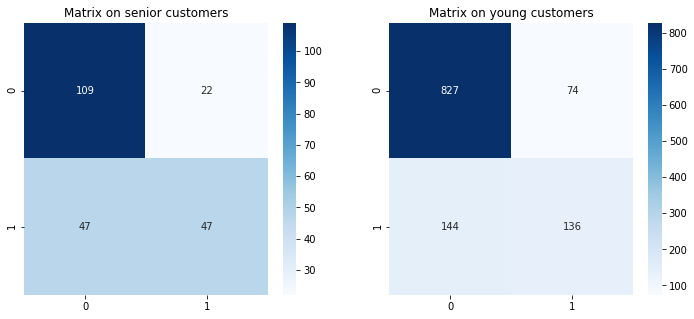

Senior
              precision    recall  f1-score   support

       False       0.70      0.83      0.76       131
        True       0.68      0.50      0.58        94

    accuracy                           0.69       225
   macro avg       0.69      0.67      0.67       225
weighted avg       0.69      0.69      0.68       225

Not senior
              precision    recall  f1-score   support

       False       0.85      0.92      0.88       901
        True       0.65      0.49      0.56       280

    accuracy                           0.82      1181
   macro avg       0.75      0.70      0.72      1181
weighted avg       0.80      0.82      0.81      1181



In [0]:
# subgroups divided by age 
cf_matrix_S = confusion_matrix(df_result[(df_result['Senior'] == True)].y_test, df_result[(df_result['Senior'] == True)].y_pred)
cf_matrix_NS = confusion_matrix(df_result[(df_result['Senior'] == False)].y_test, df_result[(df_result['Senior'] == False)].y_pred)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(cf_matrix_S, annot=True, cmap='Blues',fmt='.4g', ax=ax1).set_title('Matrix on senior customers')
sns.heatmap(cf_matrix_NS, annot=True, cmap='Blues',fmt='.4g', ax=ax2).set_title('Matrix on young customers')
plt.show()

print('Senior')
print(metrics.classification_report(df_result[(df_result['Senior'] == True)].y_test, df_result[(df_result['Senior'] == True)].y_pred))
print('Not senior')
print(metrics.classification_report(df_result[(df_result['Senior'] == False)].y_test, df_result[(df_result['Senior'] == False)].y_pred))

### Gender

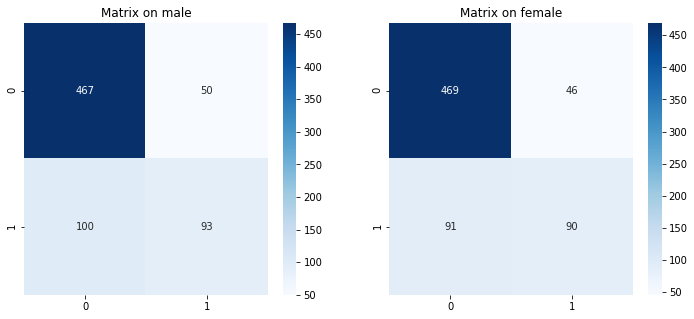

Male
              precision    recall  f1-score   support

       False       0.82      0.90      0.86       517
        True       0.65      0.48      0.55       193

    accuracy                           0.79       710
   macro avg       0.74      0.69      0.71       710
weighted avg       0.78      0.79      0.78       710

Female
              precision    recall  f1-score   support

       False       0.84      0.91      0.87       515
        True       0.66      0.50      0.57       181

    accuracy                           0.80       696
   macro avg       0.75      0.70      0.72       696
weighted avg       0.79      0.80      0.79       696



In [0]:
# subgroups divided by gender
cf_matrix_Male = confusion_matrix(df_result[(df_result['gender'] == 'Male')].y_test, df_result[(df_result['gender'] == 'Male')].y_pred)
cf_matrix_Female = confusion_matrix(df_result[(df_result['gender'] == 'Female')].y_test, df_result[(df_result['gender'] == 'Female')].y_pred)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(cf_matrix_Male, annot=True, cmap='Blues',fmt='.4g', ax=ax1).set_title('Matrix on male')
sns.heatmap(cf_matrix_Female, annot=True, cmap='Blues',fmt='.4g', ax=ax2).set_title('Matrix on female')
plt.show()

print('Male')
print(metrics.classification_report(df_result[(df_result['gender'] == 'Male')].y_test, df_result[(df_result['gender'] == 'Male')].y_pred))
print('Female')
print(metrics.classification_report(df_result[(df_result['gender'] == 'Female')].y_test, df_result[(df_result['gender'] == 'Female')].y_pred))

### Partner

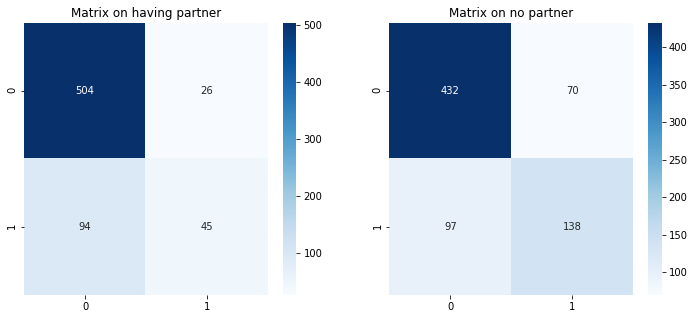

Having partner
              precision    recall  f1-score   support

       False       0.84      0.95      0.89       530
        True       0.63      0.32      0.43       139

    accuracy                           0.82       669
   macro avg       0.74      0.64      0.66       669
weighted avg       0.80      0.82      0.80       669

No partner
              precision    recall  f1-score   support

       False       0.82      0.86      0.84       502
        True       0.66      0.59      0.62       235

    accuracy                           0.77       737
   macro avg       0.74      0.72      0.73       737
weighted avg       0.77      0.77      0.77       737



In [0]:
# subgroups divided by Partner or not
cf_matrix_P = confusion_matrix(df_result[(df_result['Partner'] == True)].y_test, df_result[(df_result['Partner'] == True)].y_pred)
cf_matrix_NP = confusion_matrix(df_result[(df_result['Partner'] == False)].y_test, df_result[(df_result['Partner'] == False)].y_pred)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(cf_matrix_P, annot=True, cmap='Blues',fmt='.4g', ax=ax1).set_title('Matrix on having partner')
sns.heatmap(cf_matrix_NP, annot=True, cmap='Blues',fmt='.4g', ax=ax2).set_title('Matrix on no partner')
plt.show()

print('Having partner')
print(metrics.classification_report(df_result[(df_result['Partner'] == True)].y_test, df_result[(df_result['Partner'] == True)].y_pred))
print('No partner')
print(metrics.classification_report(df_result[(df_result['Partner'] == False)].y_test, df_result[(df_result['Partner'] == False)].y_pred))

### Dependents

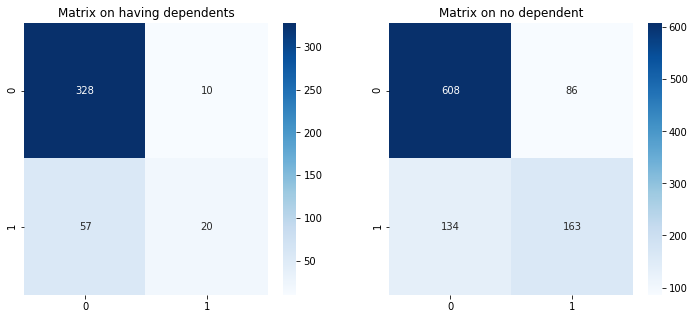

Having Dependents
              precision    recall  f1-score   support

       False       0.85      0.97      0.91       338
        True       0.67      0.26      0.37        77

    accuracy                           0.84       415
   macro avg       0.76      0.62      0.64       415
weighted avg       0.82      0.84      0.81       415

No Dependent
              precision    recall  f1-score   support

       False       0.82      0.88      0.85       694
        True       0.65      0.55      0.60       297

    accuracy                           0.78       991
   macro avg       0.74      0.71      0.72       991
weighted avg       0.77      0.78      0.77       991



In [0]:
# subgroups divided by dependents or not
cf_matrix_D = confusion_matrix(df_result[(df_result['Dependents'] == True)].y_test, df_result[(df_result['Dependents'] == True)].y_pred)
cf_matrix_ND = confusion_matrix(df_result[(df_result['Dependents'] == False)].y_test, df_result[(df_result['Dependents'] == False)].y_pred)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(cf_matrix_D, annot=True, cmap='Blues',fmt='.4g', ax=ax1).set_title('Matrix on having dependents')
sns.heatmap(cf_matrix_ND, annot=True, cmap='Blues',fmt='.4g', ax=ax2).set_title('Matrix on no dependent')
plt.show()

print('Having Dependents')
print(metrics.classification_report(df_result[(df_result['Dependents'] == True)].y_test, df_result[(df_result['Dependents'] == True)].y_pred))
print('No Dependent')
print(metrics.classification_report(df_result[(df_result['Dependents'] == False)].y_test, df_result[(df_result['Dependents'] == False)].y_pred))